In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

#Load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US_exp = df_DA_US.explode('job_skills')

df_DA_US_exp[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
df_DA_skills = df_DA_US_exp.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})

In [6]:
df_DA_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/df_DA_count * 100

high_skills = 5

df_DA_skills_top = df_DA_skills[df_DA_skills['skill_percent'] > high_skills]

df_DA_skills_top

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [13]:
df_tech = df['job_type_skills'].copy()

df_tech = df_tech.drop_duplicates()

df_tech = df_tech.dropna()

# combine all dictionaries into one
tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row) #convert string to dictionary
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict [key] += value
        else:
            tech_dict [key] = value

# avoid duplicates by converting values to set then back to list
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

tech_dict   

{'analyst_tools': ['powerbi',
  'ms access',
  'esquisse',
  'ssis',
  'outlook',
  'excel',
  'word',
  'sap',
  'datarobot',
  'sas',
  'alteryx',
  'sheets',
  'ssrs',
  'splunk',
  'microstrategy',
  'dax',
  'power bi',
  'sharepoint',
  'msaccess',
  'qlik',
  'spreadsheet',
  'looker',
  'powerpoint',
  'cognos',
  'tableau',
  'visio',
  'spss',
  'nuix'],
 'programming': ['r',
  'c#',
  'no-sql',
  'lisp',
  'clojure',
  'perl',
  'vba',
  'powershell',
  'html',
  'scala',
  'shell',
  'c++',
  'cobol',
  'vb.net',
  'css',
  'sas',
  'ocaml',
  'julia',
  'visualbasic',
  'nosql',
  'ruby',
  'mongo',
  'php',
  'golang',
  'assembly',
  'dart',
  'erlang',
  'sass',
  'bash',
  'swift',
  'groovy',
  'python',
  'matlab',
  'visual basic',
  'sql',
  'rust',
  'javascript',
  'delphi',
  'java',
  'lua',
  'pascal',
  'typescript',
  'fortran',
  'mongodb',
  'go',
  'elixir',
  'c',
  'f#',
  'objective-c',
  'apl',
  't-sql',
  'kotlin',
  'haskell',
  'crystal',
  'solid

In [14]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns = ['technology', 'skills'])

In [15]:
df_tech = df_tech.explode('skills')
df_tech

,technology,skills
0,analyst_tools,powerbi
0,analyst_tools,ms access
0,analyst_tools,esquisse
0,analyst_tools,ssis
0,analyst_tools,outlook
...,...,...
9,sync,microsoft teams
9,sync,rocketchat
9,sync,webex
9,sync,twilio


In [20]:
df_plot = df_DA_skills_top.merge(df_tech, left_on = 'job_skills', right_on= 'skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


In [7]:
from adjustText import adjust_text

/var/folders/10/q7cz89bx5qzbm22tqw5z4nvc0000gn/T/ipykernel_21450/2378745381.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tests.append(plt.text(df_DA_skills_top['skill_percent'][i], df_DA_skills_top['median_salary'][i], row))


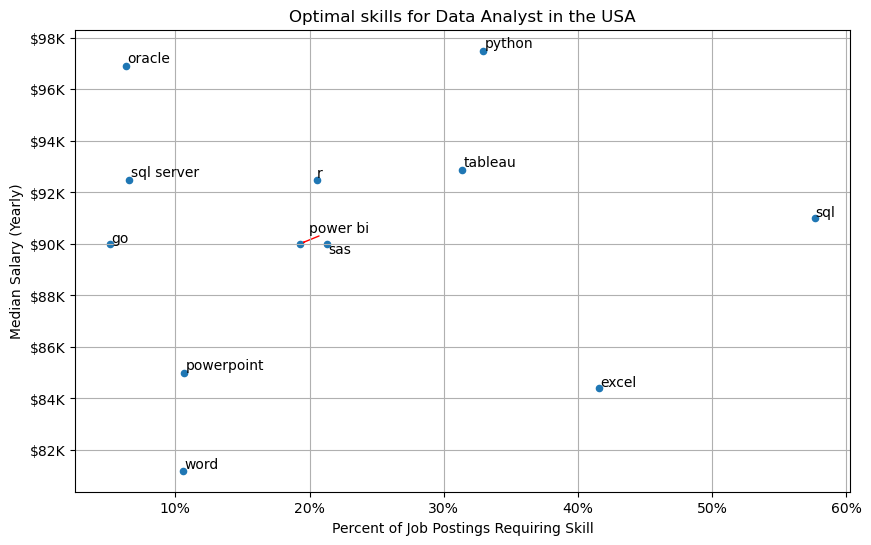

In [11]:
df_DA_skills_top.plot(kind = 'scatter', x='skill_percent', y='median_salary', figsize=(10,6))

tests = []
for i, row in enumerate(df_DA_skills_top.index):
   tests.append(plt.text(df_DA_skills_top['skill_percent'][i], df_DA_skills_top['median_salary'][i], row))
adjust_text(tests, arrowprops=dict(arrowstyle='->', color='red'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.title('Optimal skills for Data Analyst in the USA')
plt.xlabel('Percent of Job Postings Requiring Skill')
plt.ylabel('Median Salary (Yearly)')
plt.grid(True)
plt.show()

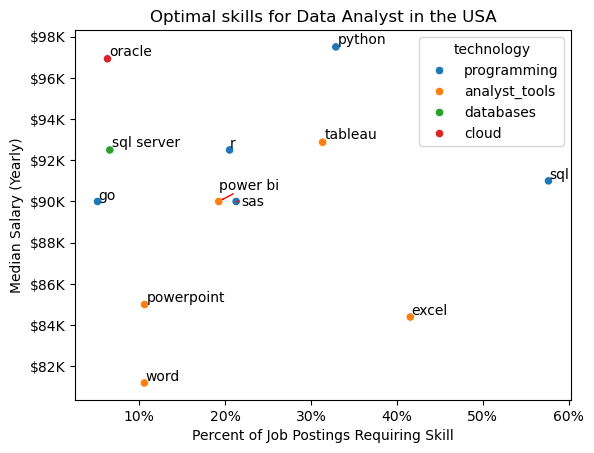

In [26]:
#df_plot.plot(kind = 'scatter', x='skill_percent', y='median_salary', figsize=(10,6))

sns.scatterplot(
   data = df_plot,
   x = 'skill_percent',
   y = 'median_salary',
   hue = 'technology'
)
tests = []
for i, row in enumerate(df_DA_skills_top.index):
   tests.append(plt.text(df_DA_skills_top['skill_percent'].iloc[i], df_DA_skills_top['median_salary'].iloc[i], row))
adjust_text(tests, arrowprops=dict(arrowstyle='->', color='red'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.title('Optimal skills for Data Analyst in the USA')
plt.xlabel('Percent of Job Postings Requiring Skill')
plt.ylabel('Median Salary (Yearly)')
plt.show()